## <실습과제 #3>
- 사이킷런에서 boston 주택 데이터셋을 로드하여 그래프로 분석하는 과정, Regrssion 수행, MSE, RMSE 결과 표현, 회귀 계수 결과까지 도출
- 데이터를 분석하면서 어떠한 데이터가 상관관계를 가지는지에 대한 간단한 생각 정리

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression - Normal Equation(정규방정식)

In [6]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y1 = 4 + 3 * X

In [7]:
X[:5]

array([[1.61938482],
       [0.68530796],
       [1.61948236],
       [1.12880672],
       [0.77882364]])

In [8]:
y[:5]

array([[9.30721963],
       [6.45713293],
       [8.48721831],
       [7.38110676],
       [6.49728483]])

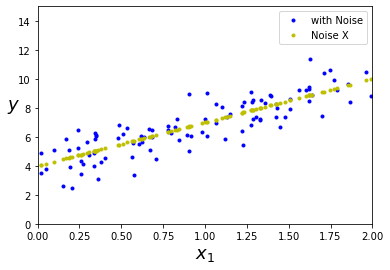

In [9]:
plt.plot(X, y, "b.", label = "with Noise")
plt.plot(X, y1, "y.", label = "Noise X")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0,2,0,15])
plt.legend()
plt.show() 

In [10]:
#정규방정식 사용
#잔차제곱의 합이 0이 나오면 최적의 가중치와 편향을 찾을 수 있다.

X_b = np.c_[np.ones((100,1)), X] #모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #정규방정식의 수식 사용

In [11]:
X_b[:5]

array([[1.        , 1.61938482],
       [1.        , 0.68530796],
       [1.        , 1.61948236],
       [1.        , 1.12880672],
       [1.        , 0.77882364]])

In [12]:
theta_best

array([[3.8893298 ],
       [3.05500127]])

In [13]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.8893298 ],
       [9.99933234]])

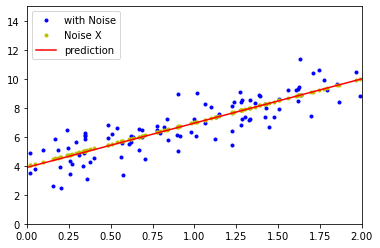

In [14]:
plt.plot(X,y,"b.", label = "with Noise")
plt.plot(X,y1,"y.",label = "Noise X")
plt.plot(X_new, y_predict, "r-", label="prediction")
plt.axis([0,2,0,15])
plt.legend()
plt.show()

## Linear Regression - Least Squared Method

In [15]:
print(X[:5])
print(y[:5])

[[1.61938482]
 [0.68530796]
 [1.61948236]
 [1.12880672]
 [0.77882364]]
[[9.30721963]
 [6.45713293]
 [8.48721831]
 [7.38110676]
 [6.49728483]]


In [16]:
mx = np.mean(X)
my = np.mean(y)

In [17]:
divisor = sum([(i-mx)**2 for i in X])

In [18]:
def top(X,mx,y,my):
    d = 0
    for i in range(len(X)):
        d += (X[i] - mx) + (y[i] - my)
    return d
dividend = top(X,mx,y,my)

In [19]:
a = dividend / divisor
b = my - (mx*a)

In [20]:
print(b,a)
print(theta_best)

[6.74663124] [2.54984768e-15]
[[3.8893298 ]
 [3.05500127]]


In [21]:
y_pred = X_new.dot(a) + b
print(y_pred[:5])
print(y_predict[:5])

[6.74663124 6.74663124]
[[3.8893298 ]
 [9.99933234]]


## Linear Regression - Gradient Descent

### Mean Square Error(MSE)

In [22]:
fake_a = 3.2
fake_b = 6
rand_x = np.array([[0], [2]])
rand_y = rand_x.dot(fake_a)+fake_b

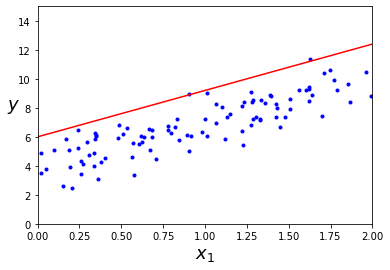

In [23]:
plt.plot(X,y,"b.")
plt.plot(rand_x, rand_y, "r-")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [24]:
real_y = np.array([[y[0]], [y[2]]])

In [25]:
def mse(y_hat, y):
    return ((y_hat-y)**2).mean()

In [26]:
mse = mse(rand_y, real_y)
mse

10.499776892432092

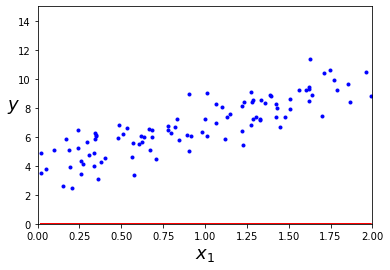

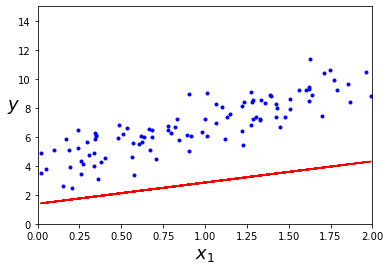

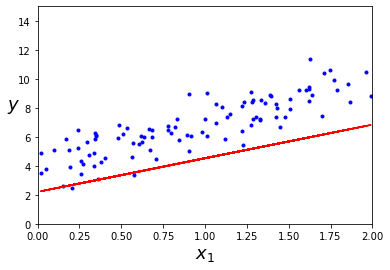

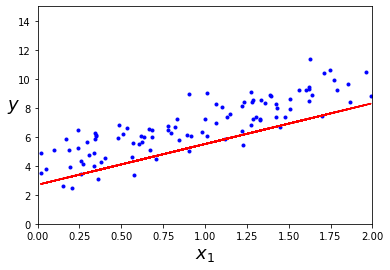

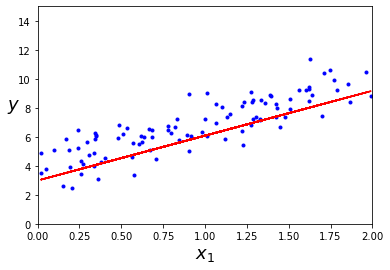

3.257056108344705 3.164750065817615


In [27]:
lr = 0.05
epoch = 500

a = 0
b = 0

for i in range(25):
    y_pred = a*X + b
    error = ((y_pred - y)**2).mean()
    
    a = a - lr * ((y_pred - y)*X).mean()
    b = b - lr * (y_pred - y).mean()
    if i % 5 == 0:
        plt.plot(X,y,"b.")
        plt.plot(X,y_pred, "r-")
        plt.xlabel("$x_1$", fontsize=18)
        plt.ylabel("$y$", rotation=0, fontsize=18)
        plt.axis([0,2,0,15])
        plt.show()
        
print(a,b)

## Linear Regression - with sklearn

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.8893298]), array([[3.05500127]]))

In [29]:
y_predict = lin_reg.predict(X_new)

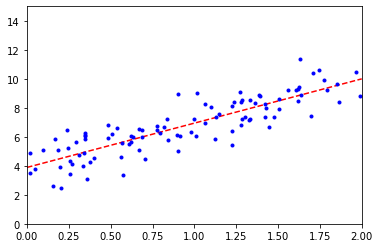

In [30]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

## 다항 회귀(Plolynomial Regression)

In [31]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

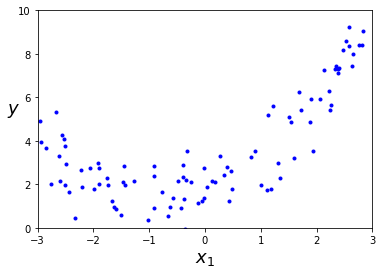

In [32]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [33]:
X.shape

(100, 1)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[:5]

array([[ 1.60093218],
       [ 2.21590468],
       [-1.50255218],
       [ 2.6361604 ],
       [-0.38758825]])

In [35]:
X_poly[:5]

array([[ 1.60093218,  2.56298383],
       [ 2.21590468,  4.91023353],
       [-1.50255218,  2.25766307],
       [ 2.6361604 ,  6.94934165],
       [-0.38758825,  0.15022465]])

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.71075582]), array([[0.93267825, 0.57977937]]))

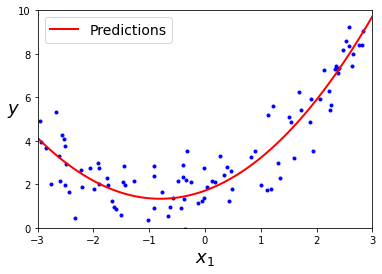

In [37]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label = "Predictions")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

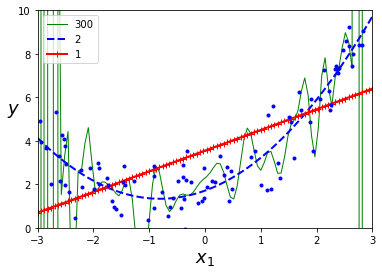

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
    

## 다항회귀 - Gradient Descent

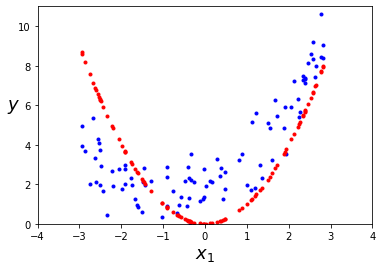

5.071378953534309


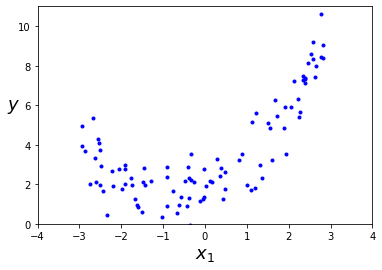

4.263585650228526e+27


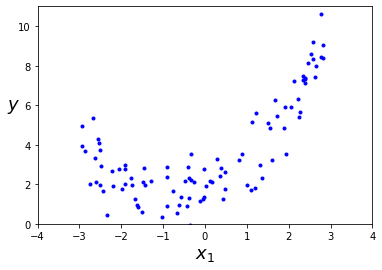

1.3072387128829233e+56


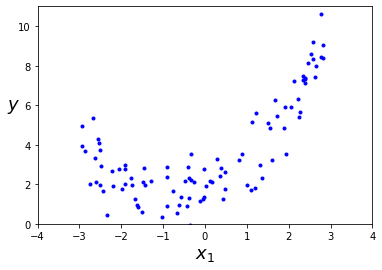

4.00806549381319e+84


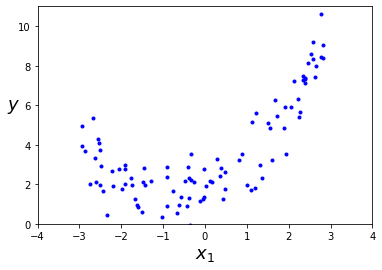

1.2288948333902896e+113


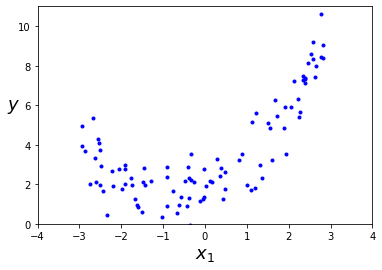

3.7678588682356825e+141


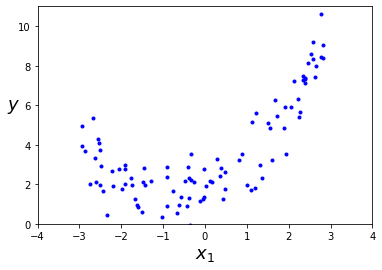

1.1552461663278447e+170


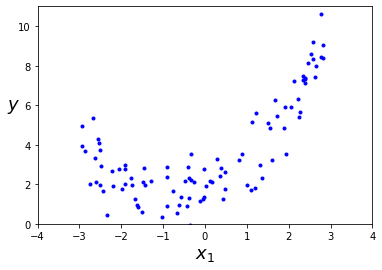

3.5420480211354374e+198


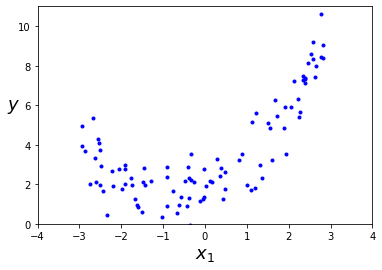

1.0860113237951274e+227


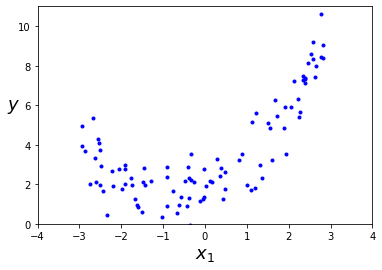

3.3297702017974643e+255


In [39]:
from sklearn.metrics import mean_squared_error

lr = 0.05
epoch = 500

a1 = 0
a2 = 0
b = 0

for i in range(200):
    XX = X**2
    
    y_pred = a1 + XX + a2 + b
    
    error = ((y_pred - y)**2).mean()
    
    a1 = a1 - lr + ((y_pred - y)*XX).mean()
    a2 = a2 - lr + ((y_pred - y)*X).mean()
    b = b - lr + (y_pred - y).mean()
    
    if i % 20 == 0:
        plt.plot(X,y,"b.")
        plt.plot(X,y_pred,"r.")
        plt.xlabel("$x_1$", fontsize = 18)
        plt.ylabel("$y$", rotation = 0, sigfontsize = 18)
        plt.axis([-4, 4, 0, 11])
        plt.show()
        print(mean_squared_error(y_pred, y))

## Logistic Regression

### sigmoid Function

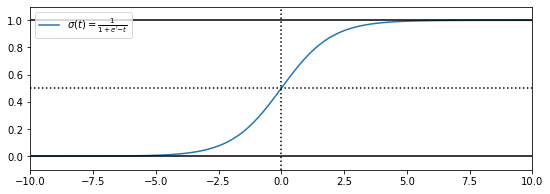

In [44]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

t = np.linspace(-10, 10, 100)
sig = sigmoid(t)

plt.figure(figsize = (9, 3))
plt.plot(t, sig, label= r"$\sigma(t) = \frac{1}{1 + e'{-t}}$")
plt.plot([0.0,0.0],[-0.1,1.1],"k:")
plt.plot([-10, 10],[0.5, 0.5],"k:")
plt.plot([-10, 10],[1.0, 1.0],"k-")
plt.plot([-10, 10],[0.0,0.0],"k-")
plt.axis([-10, 10, -0.1, 1.1])
plt.legend()
plt.show()

### Lose Function

<ipython-input-45-417c0643ba92>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(pred_value, -np.log(pred_value), label = r"$\log(\hat(p))$")
<ipython-input-45-417c0643ba92>:4: RuntimeWarning: invalid value encountered in log
  plt.plot(pred_value, -np.log(pred_value), label = r"$\log(\hat(p))$")
<ipython-input-45-417c0643ba92>:5: RuntimeWarning: invalid value encountered in log
  plt.plot(pred_value, -np.log(1-pred_value), label = r"$-\log(1-\hat(p))$")


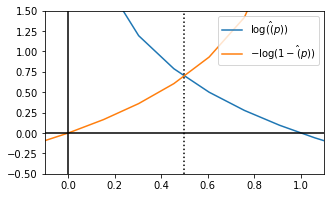

In [45]:
pred_value = np.linspace(-5, 10, 100)

plt.figure(figsize = (5, 3))
plt.plot(pred_value, -np.log(pred_value), label = r"$\log(\hat(p))$")
plt.plot(pred_value, -np.log(1-pred_value), label = r"$-\log(1-\hat(p))$")
plt.plot([-0.1, 1.1],[0.0,0.0],"k")
plt.plot([0.0,0.0],[-0.5,1.5],"k")
plt.plot([0.5, 0.5], [-0.5, 1.5], "k:")
plt.axis([-0.1, 1.1, -0.5, 1.5])
plt.legend()
plt.show()

## Boston 지역의 주택 가격 예측

In [49]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["y"] = boston.target

In [50]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


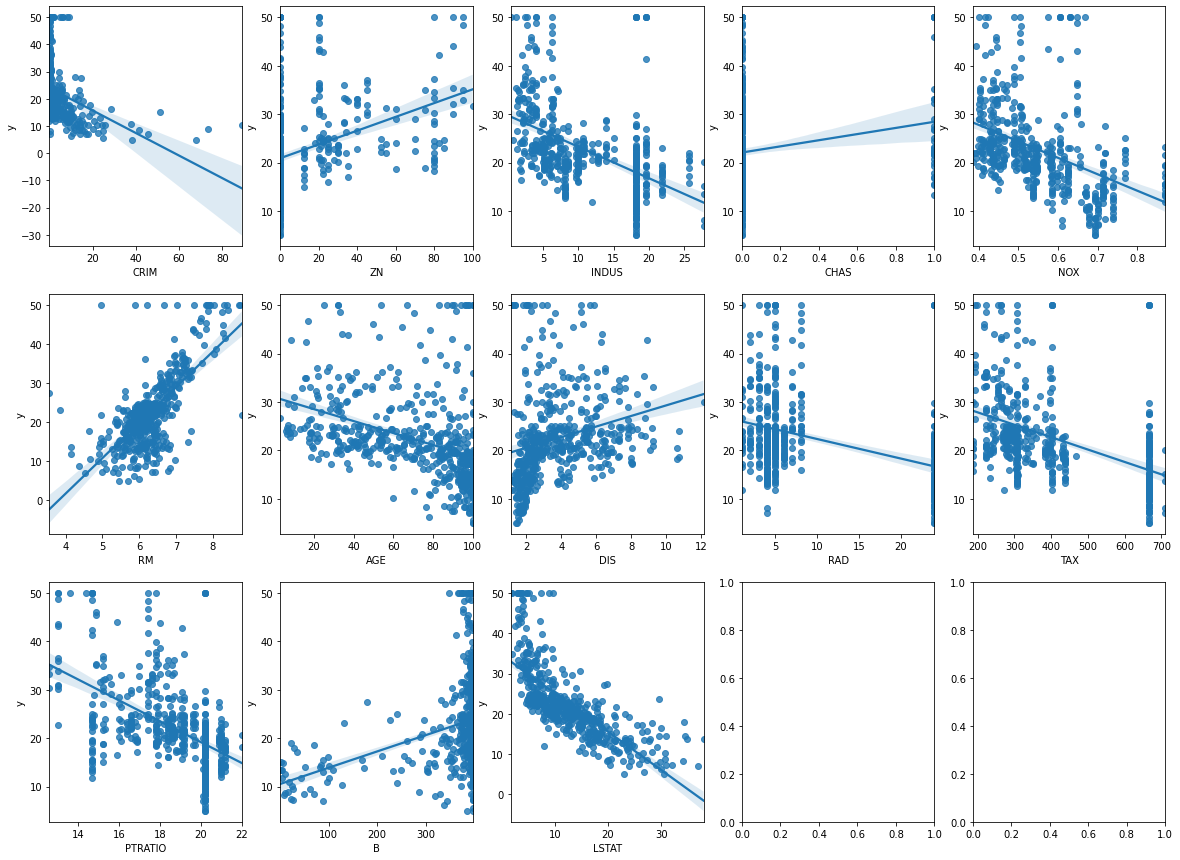

In [52]:
fig, axs = plt.subplots(figsize = (20, 15), ncols = 5, nrows = 3)
for i, feature in enumerate(boston.feature_names):
    row = int(i/5)
    col = i%5
    sns.regplot(x=feature, y="y", data=df, ax=axs[row][col])

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)